# vgsales.csv 데이터 전처리하기

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# dataframe 만들기
csv_file_path = os.getenv('HOME')+'/aiffel/data_preprocess/data/vgsales.csv'
vgsales = pd.read_csv(csv_file_path) 
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### 결측치 확인

In [136]:
# 전체 데이터 건수
print('전체 데이터 건수:', len(vgsales))

전체 데이터 건수: 16598


In [137]:
print('컬럼별 결측치 개수')
len(vgsales) - vgsales.count()

컬럼별 결측치 개수


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [138]:
vgsales[vgsales.duplicated()]

# 중복된 데이터는 없음

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


### 연도를 기준으로 정렬

In [139]:
vgsales = vgsales.sort_values('Year')
vgsales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6896,6898,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.0,0.00,0.24
2669,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
5366,5368,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34
1969,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
1766,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.0,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.0,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.0,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.0,0.00,0.01


In [140]:
# 결측치가 발견된 Year, Publisher 항목을 기준으로 Nan 값이 존재하는 행만 삭제
# drop은 원본 파일 변경되지 않는다
vgsales.dropna(subset=['Year', 'Publisher'])

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6896,6898,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.00,0.00,0.24
2669,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
5366,5368,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.00,0.00,0.34
1969,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.00,0.01,1.05
1766,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.00,0.01,1.15
...,...,...,...,...,...,...,...,...,...,...,...
4820,4822,EA Sports UFC 2,XOne,2016.0,Sports,Electronic Arts,0.23,0.14,0.00,0.04,0.40
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
16438,16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03


In [141]:
# 연도 파악

vg_year = vgsales['Year']
vg_year

6896     1980.0
2669     1980.0
5366     1980.0
1969     1980.0
1766     1980.0
          ...  
16307       NaN
16327       NaN
16366       NaN
16427       NaN
16493       NaN
Name: Year, Length: 16598, dtype: float64

In [142]:
# 평균 년도: 2006
vg_year.mean()

2006.4064433147546

In [143]:
# 가장 오래된 년도: 1980년
vg_year.min()

1980.0

In [144]:
# 가장 최근 년도: 2020년
vg_year.max()

2020.0

### Rank를 기준으로 정렬

In [145]:
# Rank 1~100위 데이터만 추출
vg_rank = vgsales[vgsales['Rank'] <= 100]
vg_rank

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
89,90,Pac-Man,2600,1982.0,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
22,23,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
96,97,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46
...,...,...,...,...,...,...,...,...,...,...,...
93,94,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,Activision,2.80,3.30,0.14,1.37,7.60
97,98,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.45
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
92,93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67


### NA_Sales(national sales) 항목의 이상치를 찾아보자! : z-score method

In [146]:
# 이상치 찾기: z-score method
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index

In [147]:
vg_rank.loc[outlier(vg_rank, 'NA_Sales', 1.5)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In [148]:
vg_rank.loc[outlier(vg_rank, 'NA_Sales', 2)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [149]:
vg_rank.loc[outlier(vg_rank, 'NA_Sales', 3)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


### NA_Sales(national sales) 항목의 이상치를 찾아보자! : IQR

In [150]:
# 이상치 찾기: IQR
def outlier2(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    return df[(df[col] < q1-1.5*iqr)|(df[col] > q3+1.5*iqr)]

vg_rank_outlier = outlier2(vg_rank, 'NA_Sales')
vg_rank_outlier

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82


In [151]:
# 이상치 제거한 데이터
vg_rank_drop = vg_rank.drop(vg_rank_outlier.index)
vg_rank_drop

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
89,90,Pac-Man,2600,1982.0,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81
22,23,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
96,97,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46
21,22,Super Mario Land,GB,1989.0,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14
18,19,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61
...,...,...,...,...,...,...,...,...,...,...,...
93,94,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,Activision,2.80,3.30,0.14,1.37,7.60
97,98,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.45
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
92,93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67


### 정규화를 해보자!

In [152]:
vg_na = vg_rank_drop["NA_Sales"]
vg_na

89     7.28
22     9.54
96     5.39
21    10.83
18    12.78
      ...  
93     2.80
97     3.24
77     1.11
92     2.93
33     5.77
Name: NA_Sales, Length: 93, dtype: float64

In [153]:
# 정규화 1: standardization
vg_standardization = (vg_na - vg_na.mean())/vg_na.std()
vg_standardization

89    0.534714
22    1.341391
96   -0.139896
21    1.801840
18    2.497866
        ...   
93   -1.064362
97   -0.907310
77   -1.667585
92   -1.017961
33   -0.004260
Name: NA_Sales, Length: 93, dtype: float64

In [154]:
# NA_Sales의 standardization 결과
vg_standardization.describe()

count    9.300000e+01
mean     2.026642e-16
std      1.000000e+00
min     -1.713987e+00
25%     -7.074256e-01
50%     -8.635566e-02
75%      4.312026e-01
max      3.143922e+00
Name: NA_Sales, dtype: float64

In [155]:
# 정규화 2: min-max Scaling
vg_min_max = (vg_na-vg_na.min())/(vg_na.max()-vg_na.min())
vg_min_max

89    0.462895
22    0.628949
96    0.324026
21    0.723733
18    0.867010
        ...   
93    0.133725
97    0.166054
77    0.009552
92    0.143277
33    0.351947
Name: NA_Sales, Length: 93, dtype: float64

In [156]:
# NA_Sales의 min-mas Scaling 결과
vg_na.describe()

count    93.000000
mean      5.781935
std       2.801617
min       0.980000
25%       3.800000
50%       5.540000
75%       6.990000
max      14.590000
Name: NA_Sales, dtype: float64

### 구간화(binning)

<AxesSubplot:>

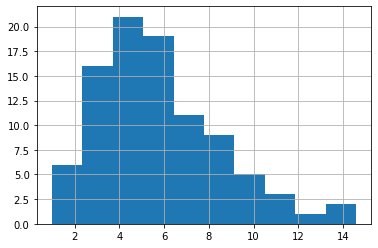

In [157]:
vg_na.hist()

In [158]:
# 6개 구간으로 균등하게 나눈다, 데이터의 최솟값에서 최댓값을
ctg = pd.cut(vg_na, bins = 6)
ctg

89      (5.517, 7.785]
22     (7.785, 10.053]
96      (3.248, 5.517]
21    (10.053, 12.322]
18     (12.322, 14.59]
            ...       
93      (0.966, 3.248]
97      (0.966, 3.248]
77      (0.966, 3.248]
92      (0.966, 3.248]
33      (5.517, 7.785]
Name: NA_Sales, Length: 93, dtype: category
Categories (6, interval[float64, right]): [(0.966, 3.248] < (3.248, 5.517] < (5.517, 7.785] < (7.785, 10.053] < (10.053, 12.322] < (12.322, 14.59]]

In [159]:
ctg.value_counts().sort_index()

(0.966, 3.248]      18
(3.248, 5.517]      28
(5.517, 7.785]      27
(7.785, 10.053]     14
(10.053, 12.322]     3
(12.322, 14.59]      3
Name: NA_Sales, dtype: int64

In [160]:
# qcut은 구간을 일정하게 나누는 것이 아니라 데이터의 분포를 비슷한 크기의 그룹으로 나눠준다
ctg = pd.qcut(vg_na, q=5)
ctg

89    (5.982, 8.138]
22    (8.138, 14.59]
96    (4.758, 5.982]
21    (8.138, 14.59]
18    (8.138, 14.59]
           ...      
93     (0.979, 3.48]
97     (0.979, 3.48]
77     (0.979, 3.48]
92     (0.979, 3.48]
33    (4.758, 5.982]
Name: NA_Sales, Length: 93, dtype: category
Categories (5, interval[float64, right]): [(0.979, 3.48] < (3.48, 4.758] < (4.758, 5.982] < (5.982, 8.138] < (8.138, 14.59]]

In [161]:
ctg.value_counts().sort_index()

(0.979, 3.48]     19
(3.48, 4.758]     18
(4.758, 5.982]    19
(5.982, 8.138]    18
(8.138, 14.59]    19
Name: NA_Sales, dtype: int64